<a href="https://colab.research.google.com/github/mgmgc/AD-IA/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 In this exercise we verify numerically the purpose of the leverage scores discussed
 in class. Generate a random linear model y = ax1 + b + ϵ where ϵ is random
 Gaussian noise with mean µ and variance σ2. For various values of µ,σ2 generate
 data and compute the leverage scores for all the points. Create four types of
 points: regular (low noise, close to the model), high variance on x, high variance
 on y andfinally high variance on both x and y. Plot all results, group in subplots
 for the various values of noise variance. Mark on the plots the points with the
 highest leverage scores. Repeat the exercise for the 2D case y = ax1+bx2+c+ϵ



1D

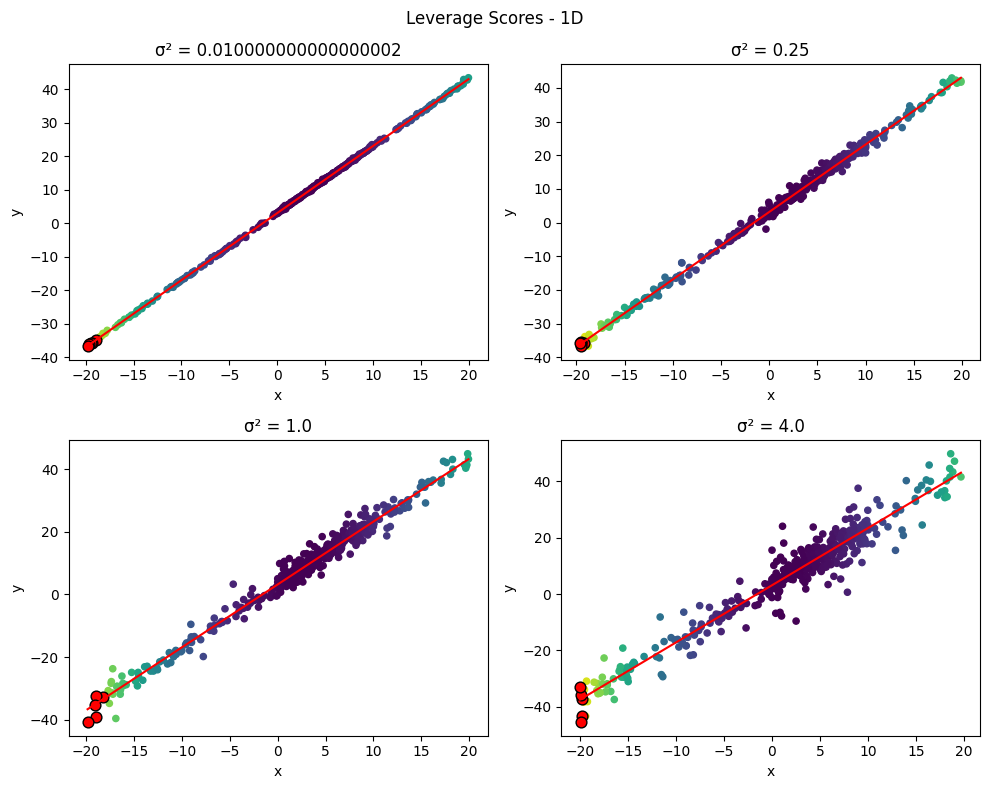

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
a, b = 2.0, 3.0
n = 100

def leverage_scores(X):
    X_ = np.hstack([np.ones((X.shape[0], 1)), X])
    H = X_ @ np.linalg.inv(X_.T @ X_) @ X_.T
    return np.diag(H)

mu = 0
sigmas = [0.1, 0.5, 1.0, 2.0]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for i, sigma in enumerate(sigmas):
    x_reg = np.linspace(0, 10, n)
    y_reg = a * x_reg + b + np.random.normal(mu, sigma, n)

    x_hx = np.random.uniform(-20, 20, n)
    y_hx = a * x_hx + b + np.random.normal(mu, sigma, n)

    x_hy = np.linspace(0, 10, n)
    y_hy = a * x_hy + b + np.random.normal(mu, 3*sigma, n)

    x_both = np.random.uniform(-20, 20, n)
    y_both = a * x_both + b + np.random.normal(mu, 3*sigma, n)

    X = np.concatenate([x_reg, x_hx, x_hy, x_both])[:, None]
    Y = np.concatenate([y_reg, y_hx, y_hy, y_both])

    h = leverage_scores(X)
    model = LinearRegression().fit(X, Y)
    y_pred = model.predict(X)

    axes[i].scatter(X, Y, c=h, cmap='viridis', s=20)
    axes[i].plot(np.sort(X[:, 0]), y_pred[np.argsort(X[:, 0])], color='red')
    top_idx = np.argsort(h)[-5:]
    axes[i].scatter(X[top_idx], Y[top_idx], c='red', edgecolor='black', s=60)
    axes[i].set_title(f"σ² = {sigma**2}")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("y")

plt.suptitle("Leverage Scores - 1D")
plt.tight_layout()
plt.show()


2D

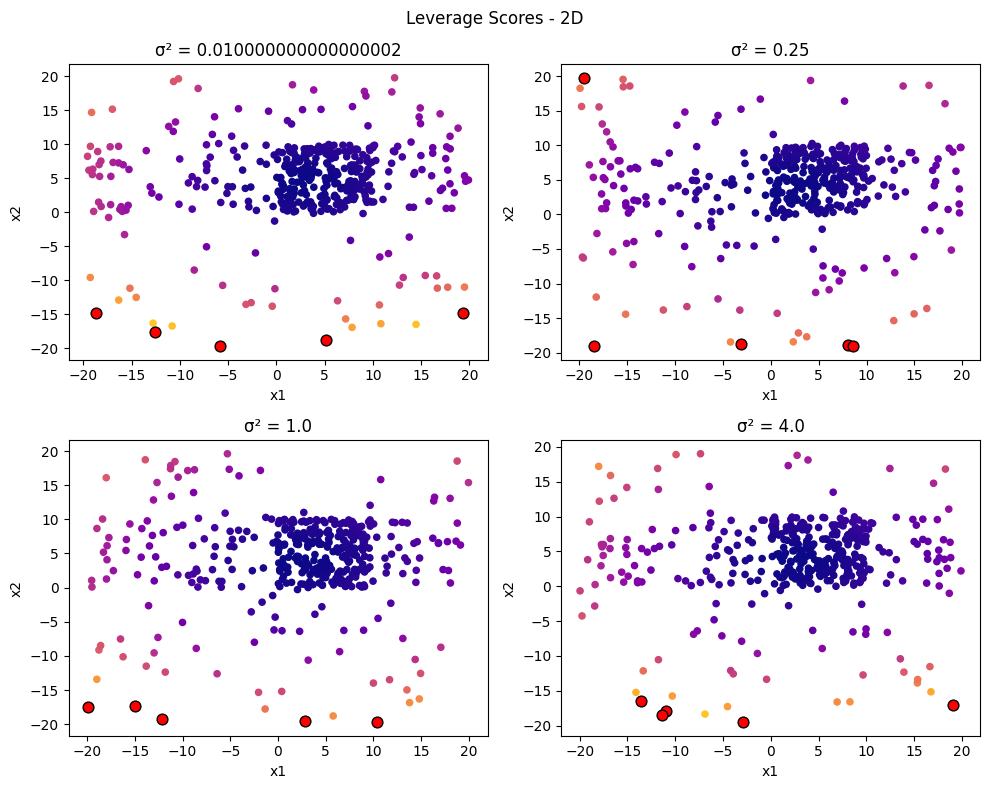

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
a, b, c = 2.0, -1.0, 5.0
n = 100

def leverage_scores(X):
    X_ = np.hstack([np.ones((X.shape[0], 1)), X])
    H = X_ @ np.linalg.inv(X_.T @ X_) @ X_.T
    return np.diag(H)

sigmas = [0.1, 0.5, 1.0, 2.0]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for i, sigma in enumerate(sigmas):
    x1_reg = np.random.uniform(0, 10, n)
    x2_reg = np.random.uniform(0, 10, n)
    y_reg = a * x1_reg + b * x2_reg + c + np.random.normal(0, sigma, n)

    x1_hx = np.random.uniform(-20, 20, n)
    x2_hx = np.random.uniform(0, 10, n)
    y_hx = a * x1_hx + b * x2_hx + c + np.random.normal(0, sigma, n)

    x1_hy = np.random.uniform(0, 10, n)
    x2_hy = np.random.uniform(0, 10, n)
    y_hy = a * x1_hy + b * x2_hy + c + np.random.normal(0, 3*sigma, n)

    x1_both = np.random.uniform(-20, 20, n)
    x2_both = np.random.uniform(-20, 20, n)
    y_both = a * x1_both + b * x2_both + c + np.random.normal(0, 3*sigma, n)

    X1 = np.concatenate([x1_reg, x1_hx, x1_hy, x1_both])
    X2 = np.concatenate([x2_reg, x2_hx, x2_hy, x2_both])
    Y = np.concatenate([y_reg, y_hx, y_hy, y_both])
    X = np.column_stack([X1, X2])

    h = leverage_scores(X)
    top_idx = np.argsort(h)[-5:]

    axes[i].scatter(X1, X2, c=h, cmap='plasma', s=20)
    axes[i].scatter(X1[top_idx], X2[top_idx], c='red', edgecolor='black', s=60)
    axes[i].set_title(f"σ² = {sigma**2}")
    axes[i].set_xlabel("x1")
    axes[i].set_ylabel("x2")

plt.suptitle("Leverage Scores - 2D")
plt.tight_layout()
plt.show()


 Using the function generate data clusters generate a 2-dimensional dataset
 with 400 train samples and 200 test samples that are organized in 2 clusters,
 with 0.1 contamination. Train a KNN model from pyod.models.knn. Use 4
 subplots in order to display using different colors (for inliers and outliers):
 • Ground truth labels for training data
 • Predicted labels for training data
 • Ground truth labels for test data
 • Predicted labels for test data
 Use different values for the n neighbors parameter and observe how this
 affects the detection of small clusters of anomalies. Also compute the balanced
 accuracy for each parameter

In [9]:
!pip install -U pyod

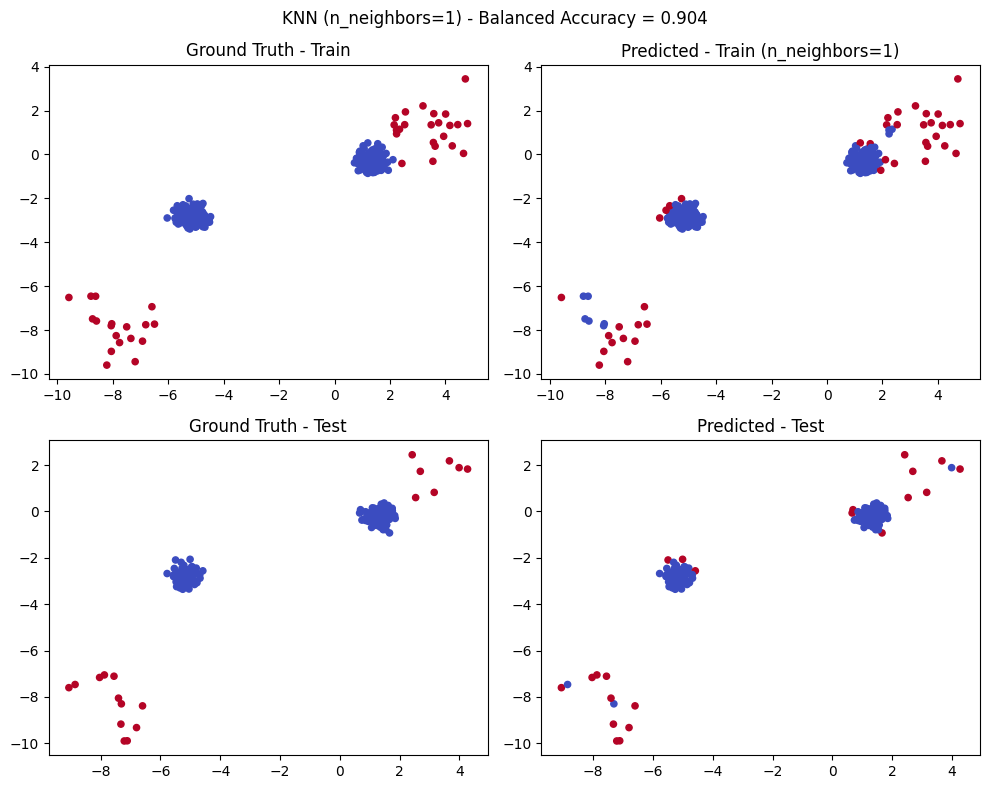

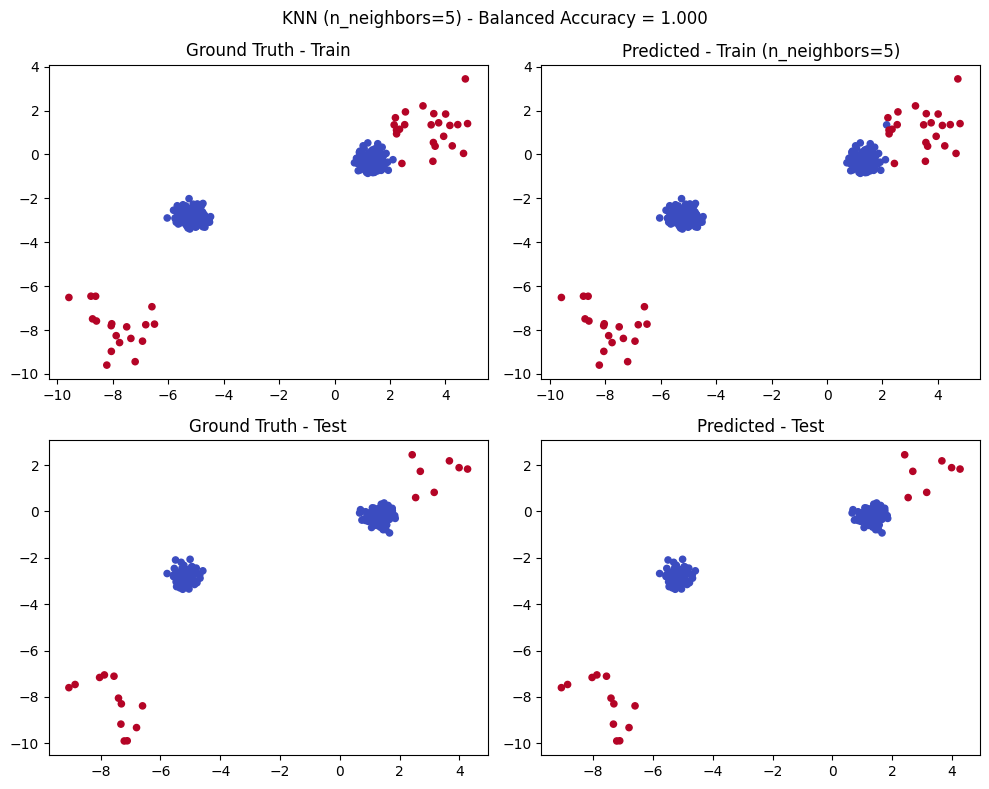

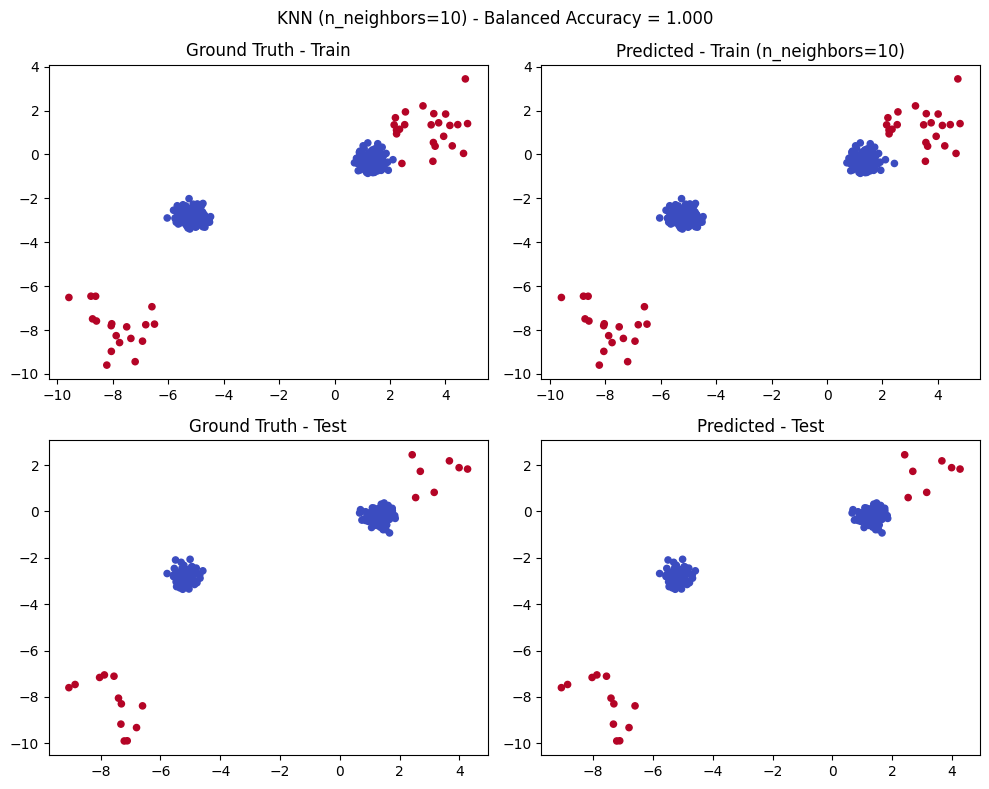

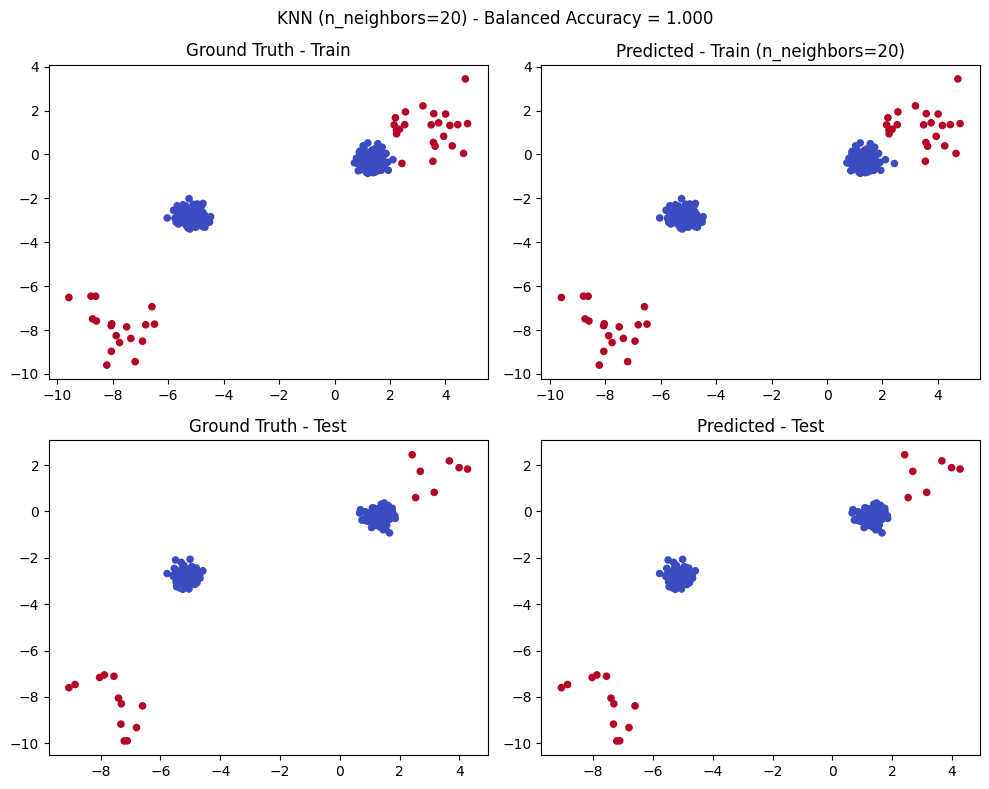

Balanced Accuracy pentru fiecare n_neighbors:
n_neighbors=1:  0.904
n_neighbors=5:  1.000
n_neighbors=10:  1.000
n_neighbors=20:  1.000


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data_clusters
from pyod.models.knn import KNN
from sklearn.metrics import balanced_accuracy_score

# Generare date
X_train, X_test, y_train, y_test = generate_data_clusters(
    n_train=400, n_test=200, n_clusters=2, n_features=2, contamination=0.1, random_state=42
)

neighbors_values = [1, 5, 10, 20]
scores = []

for n in neighbors_values:
    clf = KNN(n_neighbors=n)
    clf.fit(X_train)

    # Predicții
    y_train_pred = clf.labels_
    y_test_pred = clf.predict(X_test)

    acc = balanced_accuracy_score(y_test, y_test_pred)
    scores.append(acc)

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.ravel()

    axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=20)
    axes[0].set_title("Ground Truth - Train")

    axes[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred, cmap='coolwarm', s=20)
    axes[1].set_title(f"Predicted - Train (n_neighbors={n})")

    axes[2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=20)
    axes[2].set_title("Ground Truth - Test")

    axes[3].scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', s=20)
    axes[3].set_title("Predicted - Test")

    plt.suptitle(f"KNN (n_neighbors={n}) - Balanced Accuracy = {acc:.3f}")
    plt.tight_layout()
    plt.show()

print("Balanced Accuracy pentru fiecare n_neighbors:")
for n, acc in zip(neighbors_values, scores):
    print(f"n_neighbors={n}:  {acc:.3f}")


 In this exercise we will see the limitations of distance based algorithms like
 KNN. Specifically, we will observe how KNN behaves when our data clusters
 have different densities and how pyod.models.lof.LOF solves the problem by
 considering the variations of the local densities of the datapoints. First, generate
 2 clusters (200 and 100 samples respectively) with 2-dimensional samples using
 (-10,-10) and (10, 10) as centers, 2 and 6 as standard deviations using
 sklearn.datasets.make blobs() function. Then, fit KNN and LOF with the
 generated data using a small contamination rate (0.07) and find the predicted
 labels. Use 2 subplots to plot (using different colors for inliers and outliers) the
 2 clusters and observe how the 2 models behave for different n neighbors.

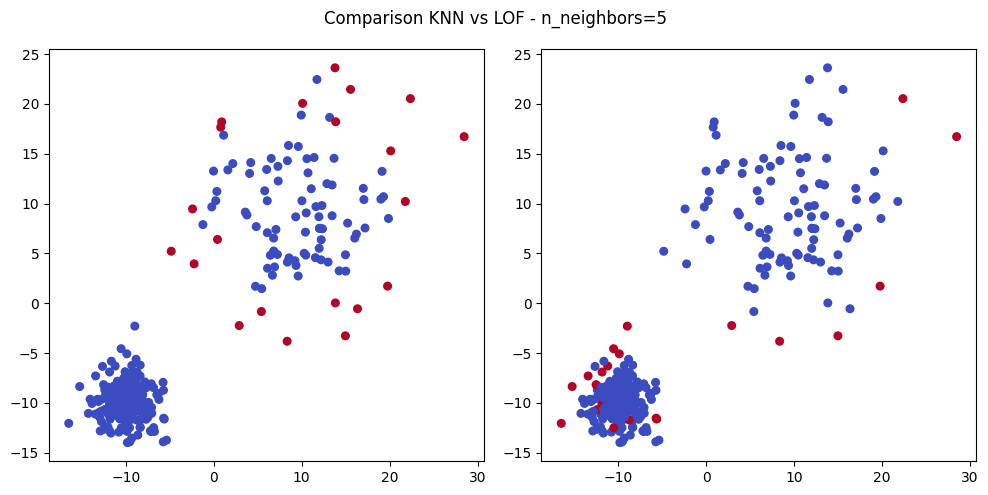

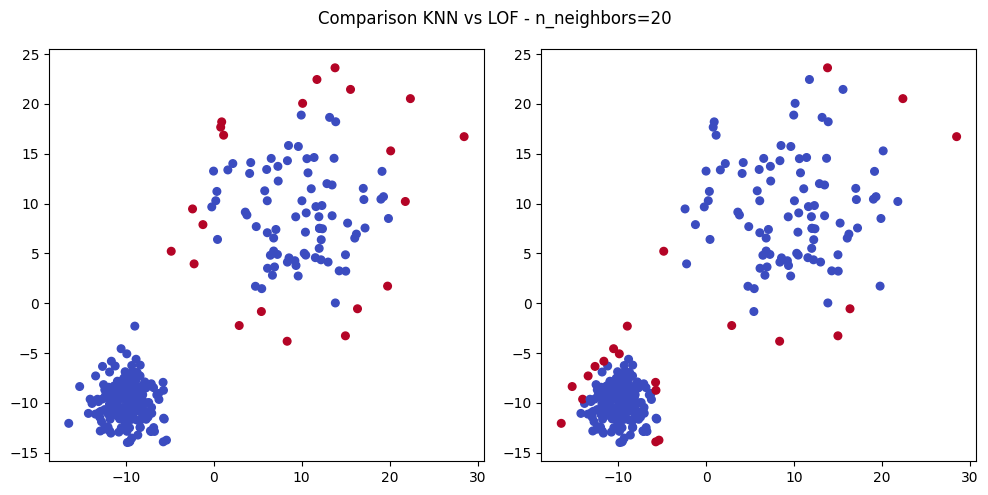

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyod.models.knn import KNN
from pyod.models.lof import LOF

X, y_true = make_blobs(
    n_samples=[200, 100],
    n_features=2,
    centers=[(-10, -10), (10, 10)],
    cluster_std=[2, 6],
    random_state=42
)

contamination = 0.07
neighbors_values = [5, 20]

for n in neighbors_values:
    knn = KNN(n_neighbors=n, contamination=contamination)
    lof = LOF(n_neighbors=n, contamination=contamination)

    knn.fit(X)
    lof.fit(X)

    y_pred_knn = knn.labels_
    y_pred_lof = lof.labels_

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].scatter(X[:, 0], X[:, 1], c=y_pred_knn, cmap='coolwarm', s=30)

    axes[1].scatter(X[:, 0], X[:, 1], c=y_pred_lof, cmap='coolwarm', s=30)

    plt.suptitle(f"Comparison KNN vs LOF - n_neighbors={n}")
    plt.tight_layout()
    plt.show()


 For this exercise we will need the cardio dataset from ODDS (https://odds.cs.
 stonybrook.edu/cardiotocogrpahy-dataset/). Load the data using scipy.io.loadmat()
 and use train test split() to split it into train and test subsets. Normalize
 your data accordingly. You will use an ensemble of classifiers of the same
 type (KNN or LOF) in order to create an average/maximization strategy
 (average/maximum score will be returned). Create 10 KNN/LOF models
 for which you vary parameter n neighbors from 30 to 120 (here you can use
 other intervals/steps if you observe that they produce better results). Fit each
 model, print the balanced accuracy (BA) for train/test data and store both the
 train and test scores in order to use them later. Normalize both scores using
 pyod.utils.utility.standardizer() and use pyod.models.combination.average()
 and pyod.models.combination.maximization() to find the final scores for
 the 2 strategies. For each of them find the threshold used for classification
 (using numpy.quantile() with the known contamination rate of the dataset),
 compute the predictions and print the balanced accuracy (BA)

In [20]:
data

{'__header__': b'MATLAB 5.0 MAT-file, written by Octave 3.8.0, 2014-12-18 10:48:09 UTC',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 0.00491231,  0.69319077, -0.20364049, ...,  0.23149795,
         -0.28978574, -0.49329397],
        [ 0.11072935, -0.07990259, -0.20364049, ...,  0.09356344,
         -0.25638541, -0.49329397],
        [ 0.21654639, -0.27244466, -0.20364049, ...,  0.02459619,
         -0.25638541,  1.14001753],
        ...,
        [-0.41835583, -0.91998844, -0.16463485, ..., -1.49268341,
          0.24461959, -0.49329397],
        [-0.41835583, -0.91998844, -0.15093411, ..., -1.42371616,
          0.14441859, -0.49329397],
        [-0.41835583, -0.91998844, -0.20364049, ..., -1.28578165,
          3.58465295, -0.49329397]]),
 'y': array([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [1.],
        [1.]])}

In [16]:
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from pyod.models.knn import KNN
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization

#incarcare dataset
data = loadmat('cardio.mat')
X = data['X']
y = data['y'].ravel().astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#normalizare
X_train_norm, X_test_norm = standardizer(X_train, X_test)

neighbors_list = range(30, 130, 10)
contamination = 0.1
train_scores, test_scores = [], []

#antrenare modelele individuale
for n in neighbors_list:
    clf = KNN(n_neighbors=n, contamination=contamination)
    clf.fit(X_train_norm)

    y_train_pred = clf.labels_
    y_test_pred = clf.predict(X_test_norm)

    acc_train = balanced_accuracy_score(y_train, y_train_pred)
    acc_test = balanced_accuracy_score(y_test, y_test_pred)

    print(f"KNN (n_neighbors={n}):  Train BA={acc_train:.3f}, Test BA={acc_test:.3f}")

    train_scores.append(clf.decision_scores_)       # scoruri train
    test_scores.append(clf.decision_function(X_test_norm))  # scoruri test

#transformare in matrice
train_scores = np.vstack(train_scores).T
test_scores = np.vstack(test_scores).T

#normalizare scoruri
train_scores_norm, test_scores_norm = standardizer(train_scores, test_scores)

#average + maximization
scores_avg = average(test_scores_norm)
scores_max = maximization(test_scores_norm)

#stabilire praguri
threshold_avg = np.quantile(scores_avg, 1 - contamination)
threshold_max = np.quantile(scores_max, 1 - contamination)

y_pred_avg = (scores_avg > threshold_avg).astype(int)
y_pred_max = (scores_max > threshold_max).astype(int)

ba_avg = balanced_accuracy_score(y_test, y_pred_avg)
ba_max = balanced_accuracy_score(y_test, y_pred_max)

print("\n--- Rezultate Ensemble ---")
print(f"Average strategy  -> Balanced Accuracy = {ba_avg:.3f}")
print(f"Maximization strategy -> Balanced Accuracy = {ba_max:.3f}")


KNN (n_neighbors=30):  Train BA=0.720, Test BA=0.760
KNN (n_neighbors=40):  Train BA=0.725, Test BA=0.794
KNN (n_neighbors=50):  Train BA=0.734, Test BA=0.796
KNN (n_neighbors=60):  Train BA=0.734, Test BA=0.803
KNN (n_neighbors=70):  Train BA=0.734, Test BA=0.803
KNN (n_neighbors=80):  Train BA=0.744, Test BA=0.794
KNN (n_neighbors=90):  Train BA=0.758, Test BA=0.802
KNN (n_neighbors=100):  Train BA=0.758, Test BA=0.810
KNN (n_neighbors=110):  Train BA=0.763, Test BA=0.809
KNN (n_neighbors=120):  Train BA=0.767, Test BA=0.817

--- Rezultate Ensemble ---
Average strategy  -> Balanced Accuracy = 0.781
Maximization strategy -> Balanced Accuracy = 0.790
